# Supervised Hebbian Learning

### Imports

In [84]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from math import exp
from numpy import newaxis
import copy
import random
%matplotlib inline 

### $$\textbf{Hebb's Postulate}$$



When an axon of cell A is near enough to excite cell B and repeatedly or persistently takes part in firing it, some growth process or matebolic change takes place in one or both cells such that A's efficiency, as one of the cells firing B, is increased.

### A Simple Architecture for Hebbian Learning

We use the Linear Associator network whose output is given by:

$$\textbf{a} = purelin(\textbf{Wp}) = \textbf{Wp}$$

It has an associative memory i.e. it will learn Q input pairs of prototype input/output vectors:

$$\{\textbf{p}_1, \textbf{t}_1\}, \{\textbf{p}_2, \textbf{t}_2\}, ... , \{\textbf{p}_3, \textbf{t}_3\}$$

The Hebb Rule for Supervised Learning is:

$$w_{ij}^{new} = w_{ij}^{old} + \alpha f_i(a_{iq}) g_j(p_{jq})$$

where $\alpha$ is the learning rate. In matrix form, assuming learning rate is 1 and f and g are identity functions, rule becomes:

$$\textbf{W}^{new} = \textbf{W}^{old} + \textbf{t}_q \textbf{p}_q^T$$

If weight matrix are initialized to zero, and vectors $\textbf{p}_1$, $\textbf{p}_2$, ... , $\textbf{p}_Q$ are orthonormal, then it can be proved that 

$$\textbf{a} = \textbf{Wp}_k = \textbf{t}_k$$

If they are not orthonormal, there is some error. Pseudoinverse rule is one of ways to reduce these errors.

Let $\textbf{P}^+$ be the pseudoinverse of $\textbf{P}$, it is given by:

$$\textbf{P}^+ = (\textbf{P}^T \textbf{P})^{-1} \textbf{P}^T$$

It can be shown that following equation satisfies the zero error condition i.e. $\textbf{T} = \textbf{WP}$:

$$\textbf{W} = \textbf{TP}^+$$

### Framework and Function

We define a function that will output the weights by performing operation as given by Hebb's Rule. 

Function will have network inputs and corresponding target outputs as input.

In [85]:
def getHebbianWeights(inputs, targets):
    # Following variables are defined (let there be Q data points, 
    # R inputs, S neurons)...
    # inputs - a  R x Q numpy array/matrix with Q column vectors as input prototype datas
    # targets - a S x Q numpy array/matrix with Q colums vectors as target prototype datas
    # weights - the output Q x R numpy array/matrix
    # pseudoInverse - the pseudinverse of inputs
    pseudoInverse = la.inv((inputs.transpose().dot(inputs))).dot(inputs.transpose())
    weights = targets.dot(pseudoInverse)
    return weights

### Test 1

In [86]:
# We want input [1, -1, -1]^T to give [-1]  and [1, 1, -1]^T to give [1]
test1Inputs = np.array([[1, -1, -1], [1, 1, -1]]).transpose()
test1Targets = np.array([[-1], [1]]).transpose()

test1Weigths = getHebbianWeights(test1Inputs, test1Targets)
print(test1Weigths)
print("------------")

# Check for [1, -1, -1]
print(test1Weigths.dot(np.array([1, -1, -1]).transpose()))

# Check for [1, -1, -1]
print(test1Weigths.dot(np.array([1, 1, -1]).transpose()))

# AS EXPECTED, THE OUTPUT BELOW IS PERFECT.

[[ 0.  1.  0.]]
------------
[-1.]
[ 1.]


### Test 2

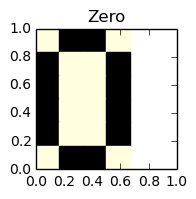

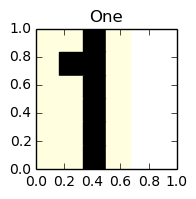

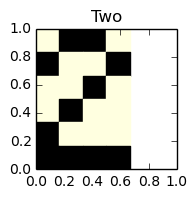

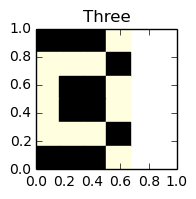

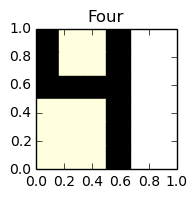

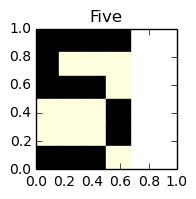

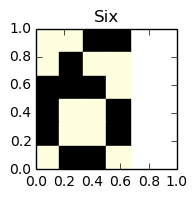

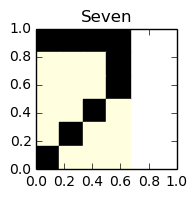

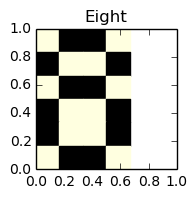

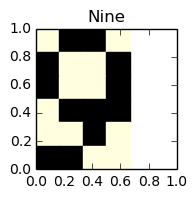

In [87]:
# We wish to create a simple network that can recognise numbers in images.
# We define numbers in 6 by 4 matrix as follows... (there will be 24 neurons, 10 outputs)

def visualizeNumber(matrix, title):
    l = 1.0/6.0
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(222, aspect = 'equal')
    ax1.set_title(title)
    npMatrix = np.array(matrix).reshape(6, 4).copy()
    for i in range(len(npMatrix)):
        for j in range(len(npMatrix[0])):
            if npMatrix[i][j] == 1:
                ax1.add_patch(patches.Rectangle((j*l, (5-i)*l), l, l, color = 'black'))
            else:
                ax1.add_patch(patches.Rectangle((j*l, (5-i)*l), l, l, color = 'lightyellow'))                
    return
                
zeroInput = [0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0]
oneInput = [0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]
twoInput = [0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1]
threeInput = [1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0]
fourInput = [1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]
fiveInput = [1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0]
sixInput = [0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0]
sevenInput = [1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0]
eightInput = [0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0]
nineInput = [0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0]

visualizeNumber(zeroInput, "Zero")
visualizeNumber(oneInput, "One")
visualizeNumber(twoInput, "Two")
visualizeNumber(threeInput, "Three")
visualizeNumber(fourInput, "Four")
visualizeNumber(fiveInput, "Five")
visualizeNumber(sixInput, "Six")
visualizeNumber(sevenInput, "Seven")
visualizeNumber(eightInput, "Eight")
visualizeNumber(nineInput, "Nine")

# FOLLOWING FIGURES HAVE THE CREATED NUMBERS IN VISUAL FORM.

In [88]:
# Outputs are as follows
zeroOut =  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
oneOut =   [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
twoOut =   [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
threeOut = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
fourOut =  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
fiveOut =  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
sixOut =   [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
sevenOut = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
eightOut = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
nineOut =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

# ONLY THE ith INDEX IS 1 FOR DENOTING i OUTPUT

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


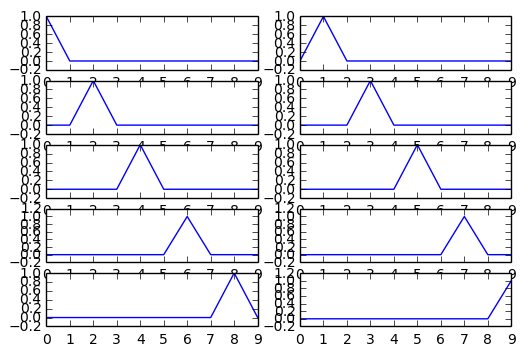

In [89]:
test2Inputs = np.array([zeroInput, oneInput, twoInput, threeInput,
                  fourInput, fiveInput, sixInput, sevenInput,
                  eightInput, nineInput]).transpose()
test2Targets = np.array([zeroOut, oneOut, twoOut, threeOut,
                   fourOut, fiveOut, sixOut, sevenOut,
                   eightOut, nineOut]).transpose()
test2Weights = getHebbianWeights(test2Inputs, test2Targets)
# print(test2Weights)

inputsForPlotting = test2Inputs.transpose()

nums = []
fig = plt.figure(1)
for i in range(len(inputsForPlotting)):
    testOutput = test2Weights.dot(np.array(inputsForPlotting[i].transpose())).ravel()
#     print(testOutput.ravel())
    nums.append(np.argmax(testOutput))
    ax = fig.add_subplot(5, 2, 1 + i)
    ax.plot(testOutput.ravel())
print(nums)
plt.show()

# AS EXPECTED (SEE GRAPHS BELOW), THERE IS NO ERROR FOR ANY OF THE OUTPUTS. 
# THESE ARE JUST PERFECT WEIGHTS!

[-0.  0. -0.  1. -0.  0. -0. -0. -0.  0.]
The number guess is 3. 


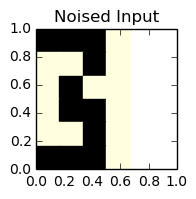

In [91]:
threeNoiseInput = [1, 1, 1, 0, 
                   0, 0, 1, 0, 
                   0, 1, 0, 0, 
                   0, 1, 1, 0, 
                   0, 0, 1, 0, 
                   1, 1, 1, 0]
visualizeNumber(threeNoiseInput, "Noised Input")
threeNoiseOutput = np.round(test2Weights.dot(np.array(threeNoiseInput)))
print(threeNoiseOutput)
print("The number guess is " + str(np.argmax(threeNoiseOutput)) + ". ")

# GUESS IS RIGHT!

[ 0. -0.  1.  0.  0.  0.  0.  0. -0. -0.]
The number guess is 2. 


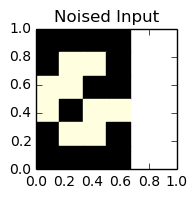

In [95]:
twoNoiseInput = [1, 1, 1, 1, 
                 1, 0, 0, 1, 
                 0, 0, 1, 1, 
                 0, 1, 0, 0, 
                 1, 0, 0, 1, 
                 1, 1, 1, 1]
visualizeNumber(twoNoiseInput, "Noised Input")
twoNoiseOutput = np.round(test2Weights.dot(np.array(twoNoiseInput)))
print(twoNoiseOutput)
print("The number guess is " + str(np.argmax(twoNoiseOutput)) + ". ")

# GUESS IS RIGHT!

[-0.  0.  0.  0.  0.  0. -0.  0.  1.  0.]
The number guess is 8. 


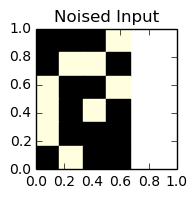

In [172]:
randomNoiseInput = np.random.random(24).round()
# print(randomNoiseInput.reshape(6, 4))
visualizeNumber(randomNoiseInput, "Noised Input")
randomNoiseOutput = np.round(test2Weights.dot(np.array(randomNoiseInput)))
print(randomNoiseOutput)
print("The number guess is " + str(np.argmax(randomNoiseOutput)) + ". ")

# Output is generally confused between several outputs.
# Though, if a number looking like figure come by chance, guess is right!
# One can play around trying to run code again and again and see what happens.

### Test 3

Here, everything has been multiplied by a factor of a. What happens is that round off becomes better judge and one can find how probable different output is since more possible values can be taken by the output.

In [173]:
a = 1000

test3Weights = getHebbianWeights(a * test2Inputs, a * test2Targets)
# print(test3Weights)

print(np.round(test3Weights.dot(a * np.array(zeroInput))))
print(np.round(test3Weights.dot(a * np.array(oneInput))))
print(np.round(test3Weights.dot(a * np.array(twoInput))))
print(np.round(test3Weights.dot(a * np.array(threeInput))))
print(np.round(test3Weights.dot(a * np.array(fourInput))))
print(np.round(test3Weights.dot(a * np.array(fiveInput))))
print(np.round(test3Weights.dot(a * np.array(sixInput))))
print(np.round(test3Weights.dot(a * np.array(sevenInput))))
print(np.round(test3Weights.dot(a * np.array(eightInput))))
print(np.round(test3Weights.dot(a * np.array(nineInput))))

[ 1000.    -0.     0.     0.     0.     0.    -0.    -0.    -0.    -0.]
[    0.  1000.     0.    -0.     0.     0.    -0.    -0.    -0.     0.]
[    0.    -0.  1000.    -0.     0.     0.    -0.    -0.    -0.     0.]
[    0.    -0.     0.  1000.    -0.     0.    -0.    -0.    -0.     0.]
[    0.    -0.     0.    -0.  1000.     0.    -0.    -0.    -0.    -0.]
[    0.    -0.     0.    -0.    -0.  1000.    -0.    -0.    -0.     0.]
[    0.    -0.     0.    -0.     0.     0.  1000.    -0.    -0.     0.]
[    0.    -0.     0.    -0.    -0.     0.    -0.  1000.    -0.    -0.]
[    0.    -0.     0.    -0.    -0.     0.    -0.    -0.  1000.     0.]
[    0.    -0.     0.    -0.    -0.     0.    -0.    -0.    -0.  1000.]


[ 469.  -69.  745.  221.  270.  -65.  150.  300. -300. -317.]
Number guess is 2. 


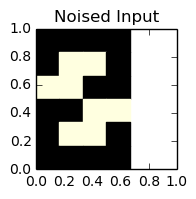

In [175]:
twoNoiseInput = [1, 1, 1, 1, 
                 1, 0, 0, 1, 
                 0, 0, 1, 1, 
                 1, 1, 0, 0, 
                 1, 0, 0, 1, 
                 1, 1, 1, 1]
visualizeNumber(twoNoiseInput, "Noised Input")
twoNoiseOutput = np.round(test3Weights.dot(a * np.array(twoNoiseInput)))
print(twoNoiseOutput)
print("Number guess is " + str(np.argmax(twoNoiseOutput)) + ". ")

# GUESS IS RIGHT

[ -94.  148.   20.   -6.  292. -286.  313.  -96.  571.  304.]
Number guess is 8. 


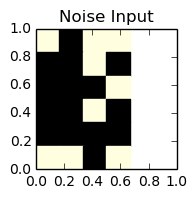

In [177]:
randomNoiseInput = np.random.random(24).round()
# print(randomNoiseInput.reshape(6, 4))
visualizeNumber(randomNoiseInput, "Noise Input")
test3RandomNoiseOutput = np.round(test3Weights.dot(np.array(a * randomNoiseInput)))
print(test3RandomNoiseOutput)
print("Number guess is " + str(np.argmax(test3RandomNoiseOutput)) + ". ")

# Output is generally confused between several outputs.
# Though, if a number looking like figure come by chance, guess is right!
# One can play around trying to run code again and again and see what happens.

# Variations of Hebbian Learning

### Filtered Learning (implement below)

Allowing learning rate to be less than 1 and adding a decay term to the weights, we get:

$$\textbf{W}^{new} = (1-\gamma)\textbf{W}^{old} + \alpha\textbf{t}_q \textbf{p}_q^T$$

where $\gamma$ is the rate at which network will forget the past inputs and $\alpha$ is rate at which it will learn new inputs.

### Delta Rule (not implemented in this notebook)

If we consider the output of the function along with the target output, consider only the error i.e. their difference and allowing learning rate $\alpha$ to be less than 1, we get:

$$\textbf{W}^{new} = \textbf{W}^{old} + \alpha (\textbf{t}_q - \textbf{a}_q) \textbf{p}_q^T$$


### Unsupervised Hebb Learning (not implemented in this notebook)

If we consider only the output and keep strengthening the outputs as more and more data is fed to network, we can get algorithm for unsupervised learning as:

$$\textbf{W}^{new} = \textbf{W}^{old} + \alpha \textbf{a}_q \textbf{p}_q^T$$


# Filtered Learning

### Transfer Function

In [178]:
def purelin(n):
    # w and p are vectors of length n and b is the bias
    # purelin simply return the sum w*p + bias
    return n*1.0

### Layer Outputs and Class 

In [179]:
def apply_on_2D(f, n):           
    # It is called 2D because it is used for 2D weight matrices.
    # f is an numpy array of functions and n is numpy array of neurons' outputs in layer.
    output = n.copy()
    S = len(f)
    for i in range(S):
        output[i] = f[i](n[i])
    return output

# TEST
# print(apply_on_2D(np.array([purelin, purelin]), np.array([2.0, 0.3])))

def getSingleLayerOutput(f, W, p, b):
    # S is the number of neurons in the layer, R is the number of inputs from previous layer. 
    # funcs or f is the function matrix (Sx1), W is the weight matrix (SxR), inputs or p is the input matrix,
    # biasses or b is the bias matrix.
    # getLayerOutput returns the result (matrix a) obtained by operating functions from funtions matrix 
    # on weights times inputs plus bias. 
    # a = f(n), n = W*p + b, return a. OR n[i] = f[i](W[i]*p + b[i])
    n = W.dot(p) + b
    return apply_on_2D(f.ravel(), n.ravel())[:, newaxis]

# TEST
# f = np.array([purelin, purelin])[:, newaxis]
# W = np.array([[1, 3, 4], [6, 2, 1]])
# p = np.array([1, 2, 3])[:, newaxis]
# b = np.array([1, 2])[:, newaxis]
# print(getSingleLayerOutput(f, W, p, b))

class FilteredHebbianNetwork(object):
    # Class contains the following variables:
    # functions - functions[i] is the transfer function of ith neuron 
    # ... all purelins by default
    # weights - weights[i][j] is jth weight for ith neuron.
    # biases - all biases zero by default
    
    def __init__(self, weights, learningRate, decay):
        self.weights = np.array(weights)
        self.learningRate = learningRate
        self.decay = decay
        return
    
    def getNumOfNeurons(self):
        # returns the number of neurons in ith layer
        return len(self.weights)
    
    def getInputSize(self):
        # returns the size of input in network to ith layer
        return len(self.weights[0])
    
    def getFunctions(self):
        return self.functions
    
    def getWeights(self):
        return self.weights
   
    def getFilteredHebbianNetworkOutput(self, inputToNet):
        return self.weights.dot(inputToNet)

# TEST
# weights = np.array([[1.5, -1.5, 1], 
#                     [1.1, 3, 2.0], 
#                     [-1.1, -2.3, 4], 
#                     [2.1, 1, 2.3]]) 
# p = np.array([1, 2, 3])[:, newaxis]

# filteredHebbianTest = FilteredHebbianNetwork(weights)
# print(filteredHebbianTest.getWeights())
# print(filteredHebbianTest.getFilteredHebbianNetworkOutput(p))

### Learning Algorithm

In [180]:
def learn(self, inputToNet, target):
    self.weights = (1 - self.decay) * self.weights + self.learningRate * target * inputToNet.transpose()
    
FilteredHebbianNetwork.learn = learn

### Test 1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


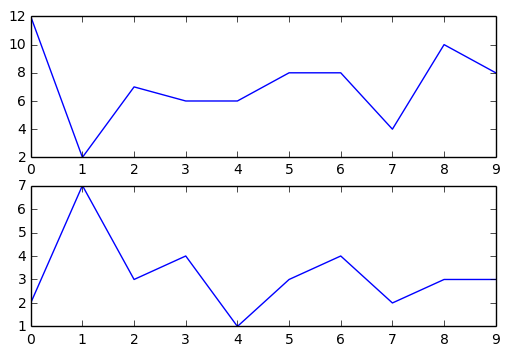

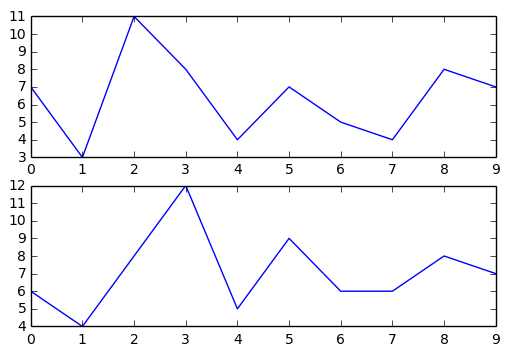

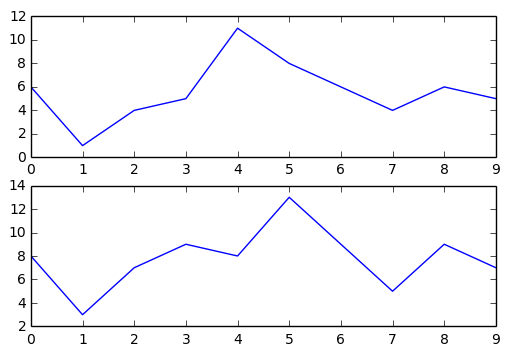

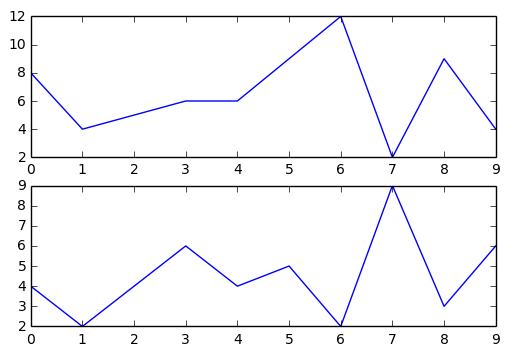

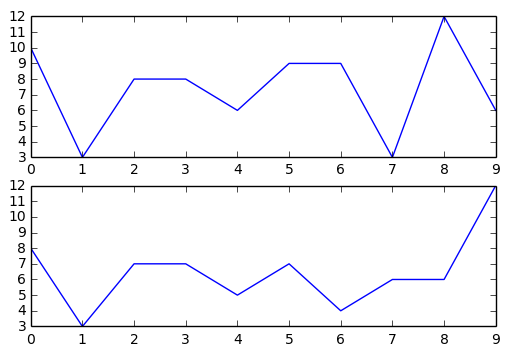

In [181]:
filteredTest1Weights = np.zeros((10, 24))
filteredHebbianTest1Inputs = [zeroInput, oneInput, twoInput, threeInput, fourInput, 
                              fiveInput, sixInput, sevenInput, eightInput, nineInput]
filteredHebbianTest1Outputs = [zeroOut, oneOut, twoOut, threeOut, fourOut,
                               fiveOut, sixOut, sevenOut, eightOut, nineOut]

# print(type(oneInput))
# print(oneInput)
# print(np.array([oneInput]).transpose())
# print(np.array([oneOut]).transpose())

filteredHebbianTest1 = FilteredHebbianNetwork(filteredTest1Weights, 1.0, 0.0)

for i in range(1):                                  # NUMBER OF ITERATIONS
    for i in range(len(filteredHebbianTest1Inputs)):
        filteredHebbianTest1.learn(np.array([filteredHebbianTest1Inputs[i]]).transpose(), 
                                   np.array([filteredHebbianTest1Outputs[i]]).transpose())

filteredHebbianTest1Weights = filteredHebbianTest1.getWeights()
# print(filteredHebbianTest1Weights)

nums = []
for i in range(len(filteredHebbianTest1Inputs)):
    testInput = np.array([filteredHebbianTest1Inputs[i]]).transpose()
    testOutput = filteredHebbianTest1.getFilteredHebbianNetworkOutput(testInput)
#     print(testOutput.ravel())
    nums.append(np.argmax(testOutput))
    fig = plt.figure(i/2 + 1)
    ax = fig.add_subplot(2, 1, i%2 + 1)
    ax.plot(testOutput.ravel())
print(nums)
plt.show()

# OBSERVE BELOW HOW THERE IS A LOT OF ERROR.
# UNLIKE THE CASE IN WHICH PSEUDOINVERSE IN USED,
# THESE ARE NOWHERE CLOSE TO PERFECT WEIGHTS. 
# *** A PROBLEM TO BE HANDLED

Graphs above can be used to see similarity between two target outputs in terms of inputs. 

For example: 3 and 8 look very similar and are fired simultaneouly almost always. 

This information can be used to make better guesses, and to output probability of the outputs rather than a definite output being more precise.

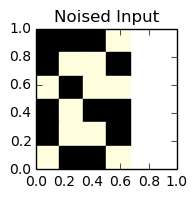

In [184]:
noisedInput = [1, 1, 1, 0, 
               1, 0, 0, 1, 
               0, 1, 0, 0, 
               1, 0, 1, 1, 
               1, 0, 0, 1, 
               0, 1, 1, 0]
visualizeNumber(noisedInput, "Noised Input")

# GUESS IS NEXT CELL...

[ 10.   3.   7.   9.   6.   9.   8.   5.  11.   7.]
Number guess is 8.


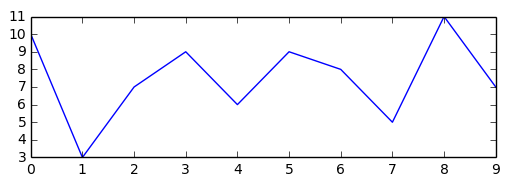

In [185]:
testInput = np.array(noisedInput).transpose()
testOutput = (filteredHebbianTest1.getFilteredHebbianNetworkOutput(testInput)).ravel()
print(testOutput)
print("Number guess is " + str(np.argmax(testOutput)) + ".")
plt.figure().add_subplot(2, 1, 1).plot(testOutput)
plt.show()

# GUESS IS RIGHT.

### Some Observations

The habb learning, when implemented with a decay (even as small as 0.1), it starts to forget the old information very fast probably because  after learning 10 inputs, $(1-0.1)^{10}$ is already down to $34\%$ of oldest weights only.

This leads to:

$$[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]$$

being identified as:

$$[8, 1, 8, 8, 4, 5, 6, 7, 8, 9]$$

If one pays a little extra attention to above, one can conclude that 0, 2, 3 are probably wrongly identified not only bacause of forgetting output, but because of similarity in their looks as well. Rest seems okay. 

# Auto-associative Memory

Network is said to have auto-associative memory when input is equal to output. 

Here we construct a Hebbian Netowork using function getHebbianWeights(inputs, targets) defined earlier and feed it the test2Inputs as both inputs and targets.

In [186]:
test4Inputs = np.array([zeroInput, oneInput, twoInput, threeInput,
                  fourInput, fiveInput, sixInput, sevenInput,
                  eightInput, nineInput]).transpose()
test4Outputs = test4Inputs

test4Weights = getHebbianWeights(test4Inputs, test4Outputs)

### Testing

[ 0.  0.  1.  0.  0.  1.  1.  0. -0. -0.  1.  0. -0. -0.  1. -0.  0.  0.
  1. -0.  0. -0.  1.  0.]


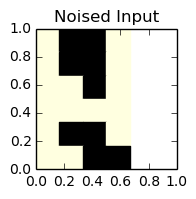

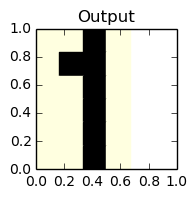

In [189]:
noisedOneInput = [0, 1, 1, 0, 
                  0, 1, 1, 0, 
                  0, 0, 1, 0, 
                  0, 0, 0, 0, 
                  0, 1, 1, 0, 
                  0, 0, 1, 1]
visualizeNumber(noisedOneInput, "Noised Input")
noisedOneOutput = np.round(test4Weights.dot(noisedOneInput))
print(noisedOneOutput)
visualizeNumber(noisedOneOutput, "Output")

[ 0.  1.  1.  1.  1.  0.  0.  1.  0. -0.  1.  1. -0.  1.  0.  0.  1.  0.
  0. -0.  1.  1.  1.  1.]


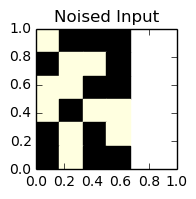

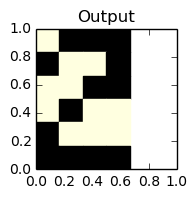

In [190]:
noisedTwoInput = [0, 1, 1, 1, 
                  1, 0, 0, 1, 
                  0, 0, 1, 1, 
                  0, 1, 0, 0, 
                  1, 0, 1, 0, 
                  1, 0, 1, 1]
visualizeNumber(noisedTwoInput, "Noised Input")
noisedTwoOutput = np.round(test4Weights.dot(noisedTwoInput))
print(noisedTwoOutput)
visualizeNumber(noisedTwoOutput, "Output")

## Repeated Feeding

If we feed the output of the network to the auto-associative network, sometimes, we can get better and better images.

[ 0.  1.  1.  0.  1.  0.  0.  1.  0.  0.  1. -0. -0.  0. -0. -0.  1.  0.
 -0.  0.  1.  1.  1.  1.]
[ 0.  1.  1.  0.  1. -0.  0.  1. -0. -0.  1.  0.  0.  1. -0.  0.  1.  0.
 -0.  0.  1.  1.  1.  1.]


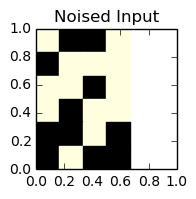

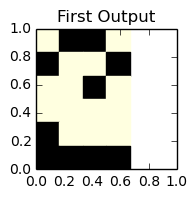

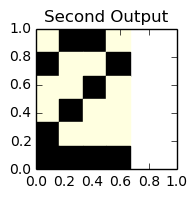

In [192]:
noisedTwoInput = [0, 1, 1, 0, 
                  1, 0, 0, 0, 
                  0, 0, 1, 0, 
                  0, 1, 0, 0, 
                  1, 1, 0, 1, 
                  1, 0, 1, 1]

visualizeNumber(noisedTwoInput, "Noised Input")

noisedTwoOutput = np.round(test4Weights.dot(noisedTwoInput))    # FIRST FEED

print(noisedTwoOutput)
visualizeNumber(noisedTwoOutput, "First Output")

noisedTwoOutput = np.round(test4Weights.dot(noisedTwoOutput))   # SECOND FEED

print(noisedTwoOutput)
visualizeNumber(noisedTwoOutput, "Second Output")


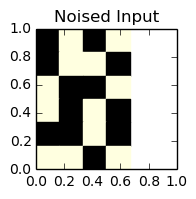

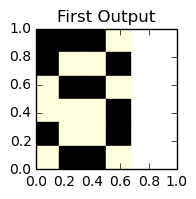

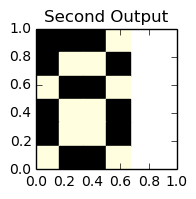

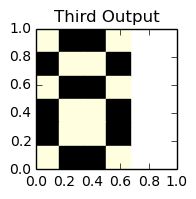

In [200]:
noisedEightInput = [1, 0, 1, 0, 
                    1, 0, 0, 1, 
                    0, 1, 1, 0, 
                    0, 1, 0, 1, 
                    1, 1, 0, 1, 
                    0, 0, 1, 0]

visualizeNumber(noisedEightInput, "Noised Input")

noisedEightOutput = np.round(test4Weights.dot(noisedEightInput))    # FIRST FEED

# print(noisedEightOutput)
visualizeNumber(noisedEightOutput, "First Output")

noisedEightOutput = np.round(test4Weights.dot(noisedEightOutput))   # SECOND FEED

# print(noisedEightOutput)
visualizeNumber(noisedEightOutput, "Second Output")

noisedEightOutput = np.round(test4Weights.dot(noisedEightOutput))   # THIRD FEED

# print(noisedEightOutput)
visualizeNumber(noisedEightOutput, "Third Output")

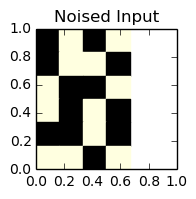

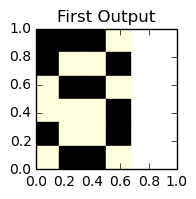

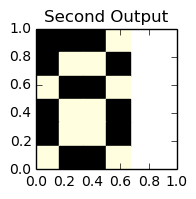

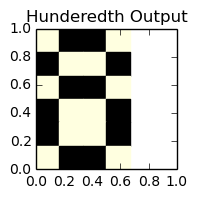

In [203]:
noisedEightInput = [1, 0, 1, 0, 
                    1, 0, 0, 1, 
                    0, 1, 1, 0, 
                    0, 1, 0, 1, 
                    1, 1, 0, 1, 
                    0, 0, 1, 0]

visualizeNumber(noisedEightInput, "Noised Input")

noisedEightOutput = np.round(test4Weights.dot(noisedEightInput))    # FIRST FEED

# print(noisedEightOutput)
visualizeNumber(noisedEightOutput, "First Output")

noisedEightOutput = np.round(test4Weights.dot(noisedEightOutput))   # SECOND FEED

# print(noisedEightOutput)
visualizeNumber(noisedEightOutput, "Second Output")

noisedEightOutput = np.round(test4Weights.dot(noisedEightOutput))   # THIRD FEED

# print(noisedEightOutput)
visualizeNumber(noisedEightOutput, "Third Output")

### Sometimes, it just doesn't converge to some proper output!

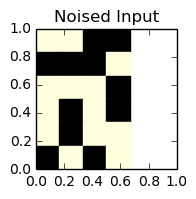

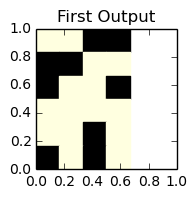

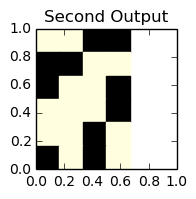

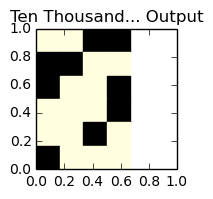

In [225]:
noisedInput = np.round(np.random.random(24))

visualizeNumber(noisedInput, "Noised Input")

noisedOutput = np.round(test4Weights.dot(noisedInput))    # FIRST FEED

# print(noisedEightOutput)
visualizeNumber(noisedOutput, "First Output")

noisedOutput = np.round(test4Weights.dot(noisedOutput))   # SECOND FEED

# print(noisedEightOutput)
visualizeNumber(noisedOutput, "Second Output")

for i in range(10000):
    noisedOutput = np.round(test4Weights.dot(noisedOutput))   # THIRD FEED

# print(noisedEightOutput)
visualizeNumber(noisedOutput, "Ten Thousand... Output")

